### 목표
- 주택 정보와 가격 데이터를 활용해서 주택 값을 예측하는 회귀모델을 만들자
- 특성공학 중 특성 곱을 해보자

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston # 보스턴 주택값 데이터

In [2]:
# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
boston = load_boston()
# boston bunch 객체

# 키 확인
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

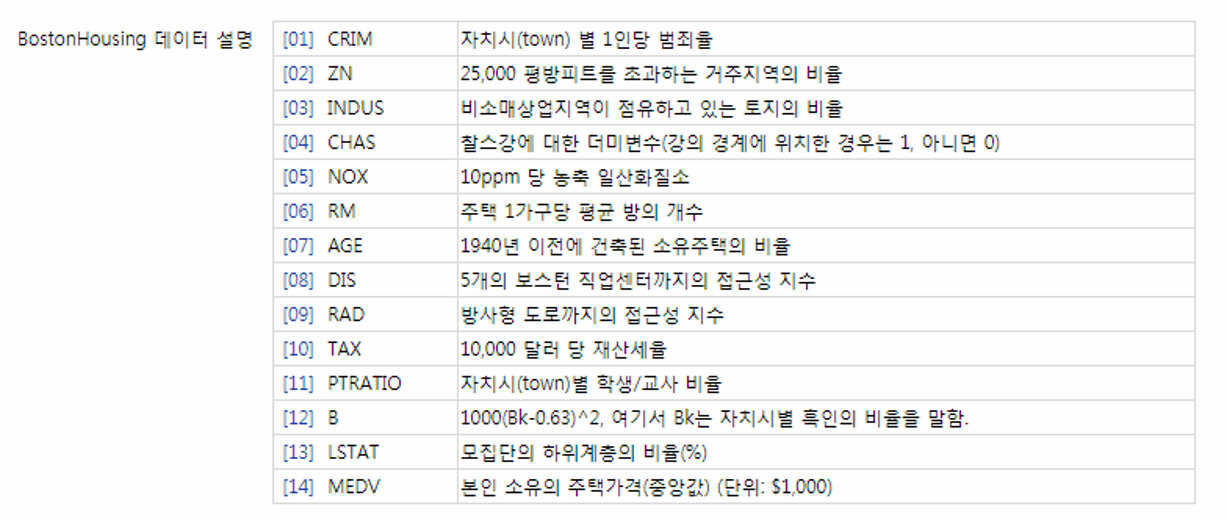

In [4]:
# 특성 데이터 = 독립변수 = 설명변수, 예측값을 설명할 수 있는 변수
# 1~13 특성
# label 데이터 = 종속변수 = 반응변수, 예측하고자 하는 값
# 14 주택가격 정보

#### 데이터 전처리
- 넘파이배열 -> 데이터프레임   분석을 편하게 하기 위해
- X : 문제
- y : 답

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [9]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

#### train test 분리
- train_test_split 사용 7:3 random_state = 0고정

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# 4개 변수로 받기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 크기 확인
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (354, 13)
y_train (354,)
X_test (152, 13)
y_test (152,)


#### 모델링
- LinearRegression 모델 사용

In [12]:
from sklearn.linear_model import LinearRegression

# 우리의 회귀모델 성능은?
# 교차검증

from sklearn.model_selection import cross_val_score

In [13]:
# 모델
linear_model = LinearRegression()

In [14]:
# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 예측
pre = linear_model.predict(X_test)
pre

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [16]:
# 일반화 성능
# 교차검증
# cv=5

linear_result = cross_val_score(linear_model, X_train, y_train, cv=5)
print('교차검증 결과 평균', linear_result.mean()) # 0.7183293974315914

# 결과가 안 좋다
# 왜?
# 이유를 막론하고 선형회귀는 하이퍼 파라미터가 없기 때문에
# 성능을 높이려면 데이터를 손봐야 한다

교차검증 결과 평균 0.7183293974315914


#### 회귀 성능 평가 지표
- 여러 머신러닝 모델을 비교할 때 성능 지표를 본다
    - mse : 오차의 제곱의 평균
        - 1 오차를 확실하게 표현한다
        - 2 제곱한 값이 연산하기 편하다 ?? 제곱한 값이 연산하기 편한지, 제곱이 연산하기 편한지
    - rmse : 오차의 제곱의 평균의 제곱근
    - mae : 오차의 절댓값의 평균
    - r2_score : 분산기반 예측 성능 평가, 실제값의 분산과 예측값의 분산을 비교

In [17]:
from sklearn.metrics import mean_squared_error # 평균제곱오차 mse
from sklearn.metrics import mean_absolute_error # 평균절대오차 mae
from sklearn.metrics import r2_score # 모델 score 함수 기능, R-Squared r2

In [18]:
# LinearRegression 적용
# mse
mean_squared_error(y_test, pre)

27.195965766883234

In [19]:
# rmse
np.sqrt(mean_squared_error(y_test, pre))

5.214975145375406

In [20]:
# mae
mean_absolute_error(y_test, pre)

3.609904060381808

In [21]:
# r2 우리말로는 결정계수?
r2_score(y_test, pre) # 0.6733825506400193 확률로 맞췄다

0.6733825506400193

In [22]:
linear_model.score(X_test, y_test) # r2와 같은 결과? 왜?

0.6733825506400193

- 모델 성능이 별로다. 개선해야한다
- 데이터가 많을수록 선형모델의 성능이 좋다. 이거를 이용해서 성능을 높여보자
- 데이터가 많을수록 모델이 데이터를 기억하거나 과대적합되기 어렵기 때문

#### 특성확장
- 모델의 성능을 높이려면 뭘 써야할까
- 특성?
    - price열과 특성 열의 상관관계 확인

In [23]:
# 상관관계 확인
# 문제와 답 연결
# 데이터 프레임으로 해보자
# boston_copy = X_train 얕은 복사
boston_copy = X_train.copy() # 복사기능. 주소를 뺀 데이터만 복사한다 깊은 복사 
# 왜 이름을 얕은 복사, 깊은 복사로 지었지? 직관적이지 않다

boston_copy['PRICE'] = y_train
boston_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,22.5
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5


In [24]:
# 상관관계 확인하기
# (-1 ~ 1)
# 0에 가까울수록 상관이 없다
# 상관계수가 큰 열 찾기
# corr()
boston_copy.corr()[['PRICE']].abs().sort_values('PRICE', ascending=False).iloc[1:]

,PRICE
LSTAT,0.743289
RM,0.708978
PTRATIO,0.564733
INDUS,0.504361
TAX,0.481319
NOX,0.426690
AGE,0.390942
RAD,0.389533
CRIM,0.388182
ZN,0.386115


상관 관계가 높은 특성을 확장하자
- 특성간의 곱 : 특성곱
- 모델이 더 세밀하고 많은 데이터를 학습할 수 있다

In [25]:
# 확장전 LSTAT 특성만 학습하고 예측을 어떻게 하는지 시각화하자
model = LinearRegression()

model.fit(X_train[['LSTAT']], y_train)

LinearRegression()

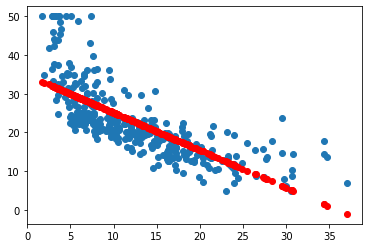

In [26]:
pre = model.predict(X_train[['LSTAT']])

# 시각화
plt.scatter(X_train['LSTAT'], y_train) # 실제값
plt.scatter(X_train['LSTAT'], pre, c='r') # 예측값

plt.show()

In [27]:
# LSTAT와 확장한 LSTAT를 학습했을 때를 비교해보자
# 예측을 어떻게 하는지 시각화하자
# 특성곱 : 배열끼리 곱
X_train['LSTAT x LSTAT'] = X_train['LSTAT']**2 # 특성확장
X_train['LSTAT x LSTAT']

141    1184.0481
272      59.7529
135     287.6416
298      24.7009
122     321.4849
         ...    
323     137.8276
192       8.2369
117     106.0900
47      353.4400
172     215.7961
Name: LSTAT x LSTAT, Length: 354, dtype: float64

In [28]:
model2 = LinearRegression()

model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)

LinearRegression()

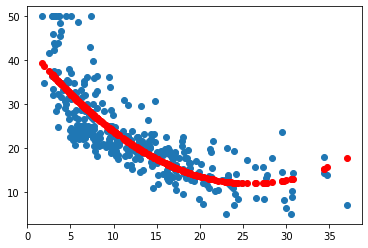

In [29]:
pre2 = model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

# 시각화
plt.scatter(X_train['LSTAT'], y_train) # 실제값
plt.scatter(X_train['LSTAT'], pre2, c='r') # 예측값

plt.show()

In [30]:
# X_test 특성확장
X_test['LSTAT x LSTAT'] = X_test['LSTAT']**2 # 특성확장
X_test['LSTAT x LSTAT']

329     53.8756
371     90.8209
219    110.2500
403    390.8529
78     152.2756
         ...   
4       28.4089
428    463.1104
385    949.2561
308     20.6116
5       27.1441
Name: LSTAT x LSTAT, Length: 152, dtype: float64

In [31]:
# 학습
linear_model2 = LinearRegression()

linear_model2.fit(X_train, y_train)

# score
linear_model2.score(X_test, y_test)

0.6978697736472479

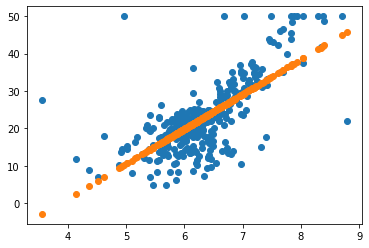

In [32]:
# 확장전 : RM 특성만 학습하고 예측하기

model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])

# 산점도

plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre)
plt.show()

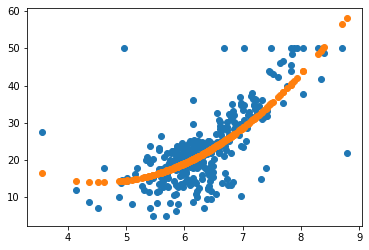

In [33]:
# 확장 후 RM 컬럼 특성 곱
# 데이터 추가하고 학습, 예측 시각화

X_train['RM x RM'] = X_train['RM']**2

model2 = LinearRegression()
model2.fit(X_train[['RM', 'RM x RM']], y_train)
pre2 = model2.predict(X_train[['RM', 'RM x RM']])

# 산점도

plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre2)
plt.show()

In [34]:
# X_test RM 특성곱
X_test['RM x RM'] = X_test['RM']**2


# 성능 평가 출력
linear_model3 = LinearRegression()

linear_model3.fit(X_train, y_train)

# score
linear_model3.score(X_test, y_test)

0.7460776611187947

모든 특성 확장

In [35]:
# LSTAT곱 RM곱 열 삭제
X_train.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace=True)
X_test.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace=True)

In [36]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [37]:
extended_X_train = X_train.copy() # 원본만 복사

In [38]:
# train
for col1 in X_train.columns:
    for col2 in X_train.columns:
        extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

In [39]:
extended_X_test = X_test.copy() # 원본만 복사

In [40]:
# train
for col1 in X_test.columns:
    for col2 in X_test.columns:
        extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

In [41]:
extended_X_train.shape, extended_X_test.shape

((354, 182), (152, 182))

In [42]:
linear_model4 = LinearRegression()
linear_model4.fit(extended_X_train, y_train)
linear_model4.score(extended_X_test, y_test) # 0.6486839499829934 ?? 떨어졌네? 모든 특성을 확장하면 안돼요!!

0.6486839499829934

- 특성이 너무 많다
- 과대적합
- 너무 많은 테스트를 이용해서 특성곱을 하지말자
- 의미있는 특성에만 특성곱을 쓰자
- LinearRegression에는 과대적합 제어하는 하이퍼 파라미터 없다
- 제어하는 모델을 써보자
    - 정규화 모델

#### ridge

In [43]:
# w 가중치를 제어하는 모델
# 과대적합 해소할 수도 있다
# w가 어떻게 변하는지 확인해보자

from sklearn.linear_model import Ridge

In [44]:
ridge_model = Ridge(alpha=100) # alpha???

# 규제를 적게 하려면 alpha를 작게. 과대적합 제어 작게함
# 규제를 크게 하려면 alpha를 크게. 과대적합 제어 크게함

In [46]:
# 학습
ridge_model.fit(extended_X_train, y_train)

# 평가
ridge_model.score(extended_X_test, y_test)

0.7767755128062308

#### Ridge vs Lasso 비교
- lasso 정규화 모델(L1규제)
    - 가중치 기본값이 너무 작다. 가중치가 쉽게 0이 된다
    - 모든 W를 똑같이 규제한다
- ridge정규화 모델(L2규제)
    - 특정 가중치가 너무 커지는 상황을 방지한다
    - 서서히 0에 수렴한다
    - W를 골고루 규제해서 0에 가깝게 만든다

In [55]:
from sklearn.linear_model import Lasso, Ridge

In [56]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_coef_list = [] # 릿지 정규화 모델 가중치 변화 저장
lasso_coef_list = [] # 라쏘 정규화 모델 가중치 변화 저장

for a in alpha_list:
    r_model = Ridge(alpha=a)
    l_model = Lasso(alpha=a)
    
    # 학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    
    # 가중치 저장
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [62]:
# 가중치 DataFrame 만들기
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T, columns=alpha_list, index=X_train.columns)
ridge_df

,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
CRIM,-0.121304,-0.121251,-0.120763,-0.118309,-0.116008,-0.109848,-0.089402
ZN,0.044470,0.044497,0.044753,0.046126,0.048609,0.053624,0.054174
INDUS,0.011278,0.010711,0.005540,-0.020863,-0.047175,-0.052950,-0.035259
CHAS,2.511254,2.511310,2.510884,2.458686,1.785961,0.483850,0.071015
NOX,-16.215572,-16.075800,-14.800321,-8.259585,-1.540350,-0.163749,-0.006989
RM,3.859184,3.860214,3.869280,3.897485,3.620640,1.972206,0.431777
AGE,-0.010001,-0.010144,-0.011441,-0.017914,-0.021636,-0.005280,0.028926
DIS,-1.500067,-1.498261,-1.481782,-1.397372,-1.309680,-1.183078,-0.538181
RAD,0.242095,0.241661,0.237723,0.218432,0.211507,0.253968,0.239244
TAX,-0.011073,-0.011082,-0.011165,-0.011634,-0.012664,-0.014718,-0.015490


In [63]:
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T, columns=alpha_list, index=X_train.columns)
lasso_df

,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
CRIM,-0.121161,-0.119781,-0.113118,-0.065862,-0.000000,-0.000000,-0.0
ZN,0.044526,0.045093,0.047251,0.048329,0.031050,0.000000,0.0
INDUS,0.009928,-0.001208,-0.039925,-0.000000,-0.000000,-0.000000,-0.0
CHAS,2.497490,2.371394,0.964789,0.000000,0.000000,0.000000,0.0
NOX,-15.884229,-12.789549,-0.000000,-0.000000,0.000000,-0.000000,-0.0
RM,3.859429,3.863614,3.722896,0.868985,0.000000,0.000000,0.0
AGE,-0.010292,-0.013035,-0.021431,0.012180,0.000000,-0.000000,-0.0
DIS,-1.495377,-1.450155,-1.233704,-0.751094,-0.000000,0.000000,0.0
RAD,0.241125,0.232505,0.204690,0.200074,0.000000,-0.000000,-0.0
TAX,-0.011097,-0.011366,-0.012944,-0.013951,-0.010997,-0.021888,-0.0
